In [3804]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import SelectKBest, f_regression
from scipy.stats import f
import matplotlib.pyplot as plt

In [3805]:
df = pd.read_csv('/Users/PJizzle/Code/Data Mining Project/vgsales.csv')

In [3806]:
df = df.drop('NA_Sales', axis=1)

In [3807]:
df = df.drop('EU_Sales', axis=1)

In [3808]:
df = df.drop('JP_Sales', axis=1)

In [3809]:
df

,Year,Genre,Global_Sales,Rank
0,2006.0,Sports,82.74,1
1,1985.0,Platform,40.24,2
2,2008.0,Racing,35.82,3
3,2009.0,Sports,33.00,4
4,1996.0,Role-Playing,31.37,5
5,1989.0,Puzzle,30.26,6
6,2006.0,Platform,30.01,7
7,2006.0,Misc,29.02,8
8,2009.0,Platform,28.62,9
9,1984.0,Shooter,28.31,10


In [3810]:
classes = pd.Series(df['Genre'].unique(), name='Genre')

In [3811]:
classes

0           Sports
1         Platform
2           Racing
3     Role-Playing
4           Puzzle
5             Misc
6          Shooter
7       Simulation
8           Action
9         Fighting
10       Adventure
11        Strategy
Name: Genre, dtype: object

In [3812]:
classes=classes.to_frame()

In [3813]:
type(classes)

/Users/PJizzle/anaconda3/lib/python3.6/site-packages/IPython/core/displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


pandas.core.frame.DataFrame

In [3814]:
classes['Sports'] = (classes['Genre'] == 'Sports') + 0
classes['Platform'] = (classes['Genre'] == 'Platform') + 0
classes['Racing'] = (classes['Genre'] == 'Racing') + 0
classes['Role-Playing'] = (classes['Genre'] == 'Role-Playing') + 0
classes['Puzzle'] = (classes['Genre'] == 'Puzzle') + 0
classes['Misc'] = (classes['Genre'] == 'Misc') + 0
classes['Shooter'] = (classes['Genre'] == 'Shooter') + 0
classes['Simulation'] = (classes['Genre'] == 'Simulation') + 0
classes['Action'] = (classes['Genre'] == 'Action') + 0
classes['Fighting'] = (classes['Genre'] == 'Fighting') + 0
classes['Adventure'] = (classes['Genre'] == 'Adventure') + 0
classes['Strategy'] = (classes['Genre'] == 'Strategy') + 0

In [3815]:
df = df.dropna()

In [3816]:
df.isnull().values.any()

False

In [3817]:
df2 = pd.merge(df, classes)

In [3818]:
df2
len(df2)

16327

In [3819]:
df_fighting = (df2['Year'] == 2015) & (df2['Genre'] == 'Strategy')
fighting2015 = df2[df_fighting]
type(fighting2015)

pandas.core.frame.DataFrame

In [3820]:
fighting2015 = fighting2015.reset_index()


In [3821]:
fighting2015.index = fighting2015.index + 1
fighting2015 = fighting2015.reset_index()
fighting2015 = fighting2015.drop('index', axis=1)
fighting2015.head()

,level_0,Year,Genre,Global_Sales,Rank,Sports,Platform,Racing,Role-Playing,Puzzle,Misc,Shooter,Simulation,Action,Fighting,Adventure,Strategy
0,1,2015.0,Strategy,0.51,3890,0,0,0,0,0,0,0,0,0,0,0,1
1,2,2015.0,Strategy,0.25,6745,0,0,0,0,0,0,0,0,0,0,0,1
2,3,2015.0,Strategy,0.23,6989,0,0,0,0,0,0,0,0,0,0,0,1
3,4,2015.0,Strategy,0.22,7292,0,0,0,0,0,0,0,0,0,0,0,1
4,5,2015.0,Strategy,0.20,7550,0,0,0,0,0,0,0,0,0,0,0,1


In [3822]:
fighting2015["Global_Sales"].mean()

0.10705882352941178

In [3823]:
X = fighting2015[['level_0']]
X.shape

(17, 1)

In [3824]:
df_NoYear = (df2['Year'] < 2015) & (df2['Year'] > 2003) & (df2['Genre'] == 'Strategy') & (df2['Year'] != 2012)
df_New = df2[df_NoYear]
type(df_New)
df_New

,Year,Genre,Global_Sales,Rank,Sports,Platform,Racing,Role-Playing,Puzzle,Misc,Shooter,Simulation,Action,Fighting,Adventure,Strategy
15658,2010.0,Strategy,4.83,218,0,0,0,0,0,0,0,0,0,0,0,1
15663,2009.0,Strategy,2.63,579,0,0,0,0,0,0,0,0,0,0,0,1
15668,2010.0,Strategy,1.69,1071,0,0,0,0,0,0,0,0,0,0,0,1
15669,2013.0,Strategy,1.67,1094,0,0,0,0,0,0,0,0,0,0,0,1
15673,2011.0,Strategy,1.55,1208,0,0,0,0,0,0,0,0,0,0,0,1
15675,2011.0,Strategy,1.45,1322,0,0,0,0,0,0,0,0,0,0,0,1
15678,2009.0,Strategy,1.31,1509,0,0,0,0,0,0,0,0,0,0,0,1
15680,2004.0,Strategy,1.20,1671,0,0,0,0,0,0,0,0,0,0,0,1
15681,2011.0,Strategy,1.18,1716,0,0,0,0,0,0,0,0,0,0,0,1
15682,2008.0,Strategy,1.17,1719,0,0,0,0,0,0,0,0,0,0,0,1


In [3825]:
y = fighting2015['Global_Sales']

In [3826]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)
x2_train, x2_test, y2_train, y2_test = sklearn.model_selection.train_test_split(X,y)

In [3827]:
reg = linear_model.LinearRegression()
reg2 = linear_model.LinearRegression()

In [3828]:
reg.fit(np.log(1+x_train), np.log(y_train))
reg2.fit(np.log(1+x2_train), np.log(y2_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [3829]:
y_pred = np.exp(reg.predict(np.log(1+x_test)))
y2_pred = np.exp(reg2.predict(np.log(1+x2_test)))

In [3830]:
print("variance score: %.2f" % r2_score(y2_test, y2_pred))

variance score: 0.94


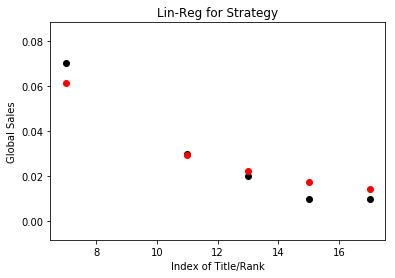

In [3831]:
plt.scatter(x2_test, y2_test,  color='black')
plt.plot(x2_test, y2_pred, 'o', color='red', linewidth=2)
plt.xlabel('Index of Title/Rank')
plt.ylabel('Global Sales')
plt.title('Lin-Reg for Strategy')
plt.show()

In [3832]:
reg2.coef_

array([-1.80049306])

In [3833]:
reg2.intercept_

0.95336812767088652

In [3834]:
y2_pred.sort()
y2_pred

array([ 0.01425388,  0.01762109,  0.02241026,  0.02957905,  0.06138118])

In [3835]:
y2_test.sort_values(ascending=True)

16    0.01
14    0.01
12    0.02
10    0.03
6     0.07
Name: Global_Sales, dtype: float64